In [137]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [138]:
df = pd.read_csv("kerala.csv")
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [139]:
df.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

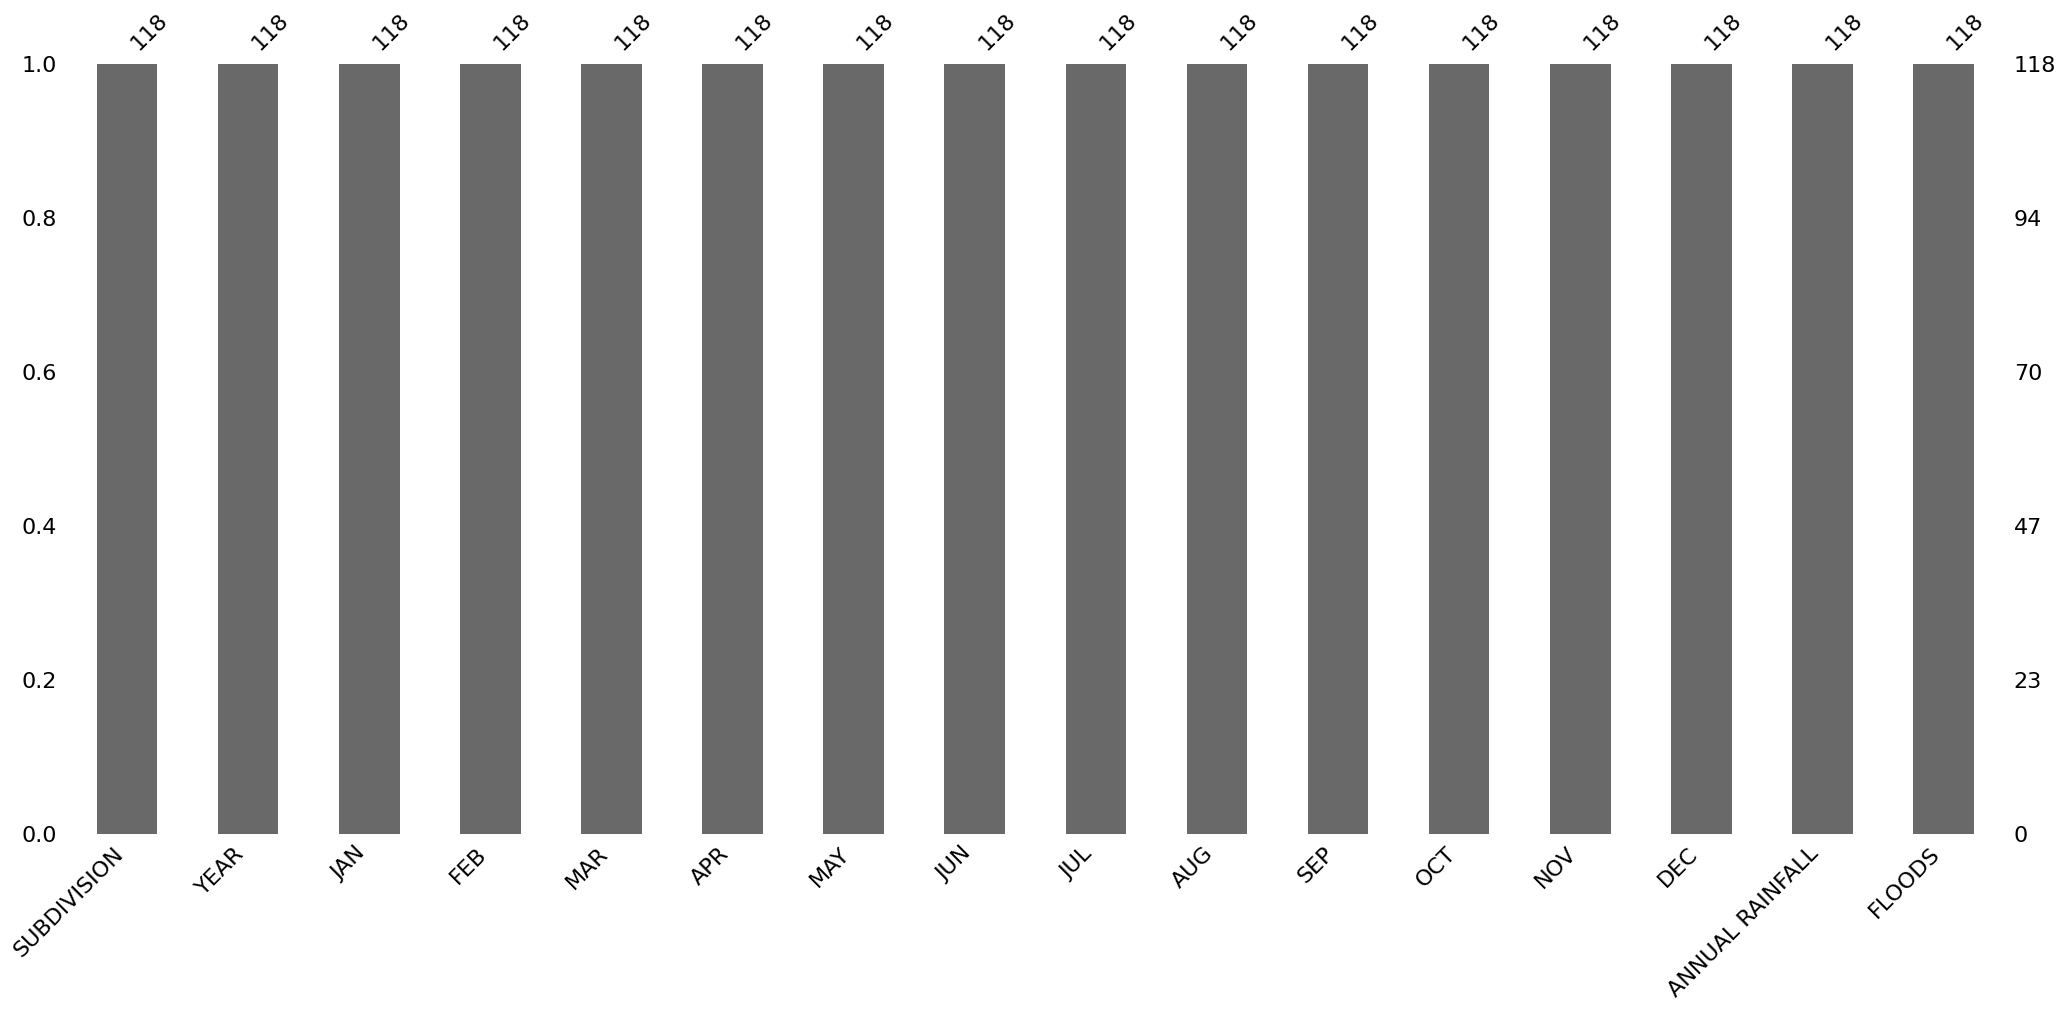

In [140]:
msno.bar(df)
plt.show()

In [141]:
df = df.drop(columns=["SUBDIVISION", "YEAR"])
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [142]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [143]:
y

array(['YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES'], dtype=object)

In [144]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [145]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1])

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [147]:
# # Modeling dengan Kernel Linear
# svm = SVC(kernel="linear",C=1.0, gamma="scale", random_state=0)
# svm.fit(x_train, y_train)

# # Evaluasi
# y_pred_linear = svm.predict(x_test)

# # Confusion Matrix
# print("Confusion Matrix (Linear Kernel):")
# print(confusion_matrix(y_test, y_pred_linear))

# # Classification Report
# print("\nClassification Report (Linear Kernel):")
# print(classification_report(y_test, y_pred_linear, target_names=encoder.classes_))

# # Cetak Akurasi
# print(f'Accuracy Score (Linear Kernel): {accuracy_score(y_test, y_pred_linear)}')

# # Visualisasi Confusion Matrix dengan Heatmap
# sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
# plt.xlabel('Prediksi')
# plt.ylabel('Label')
# plt.title('Confusion Matrix (Linear Kernel)')
# plt.show()

In [148]:
# # Modeling dengan Kernel RBF
# svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=0)
# svm_rbf.fit(x_train, y_train)

# y_pred_rbf = svm_rbf.predict(x_test)

# # Confusion Matrix
# print("Confusion Matrix (RBF Kernel):")
# print(confusion_matrix(y_test, y_pred_rbf))

# # Classification Report
# print("\nClassification Report (RBF Kernel):")
# print(classification_report(y_test, y_pred_rbf, target_names=encoder.classes_))

# # Cetak Akurasi
# print(f'Accuracy Score (RBF Kernel): {accuracy_score(y_test, y_pred_rbf)}')

# # Visualisasi Confusion Matrix dengan Heatmap
# sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
# plt.xlabel('Prediksi')
# plt.ylabel('Label')
# plt.title('Confusion Matrix (RBF Kernel)')
# plt.show()

In [149]:
# # Modeling dengan Kernel Polynomial
# svm_poly = SVC(kernel="poly", degree=3, C=1.0, gamma="scale", random_state=0)  # degree=3 adalah default
# svm_poly.fit(x_train, y_train)

# y_pred_poly = svm_poly.predict(x_test)

# # Confusion Matrix
# print("Confusion Matrix (Polynomial Kernel):")
# print(confusion_matrix(y_test, y_pred_poly))

# # Classification Report
# print("\nClassification Report (Polynomial Kernel):")
# print(classification_report(y_test, y_pred_poly, target_names=encoder.classes_))

# # Cetak Akurasi
# print(f'Accuracy Score (Polynomial Kernel): {accuracy_score(y_test, y_pred_poly)}')

# # Visualisasi Confusion Matrix dengan Heatmap
# sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
# plt.xlabel('Prediksi')
# plt.ylabel('Label')
# plt.title('Confusion Matrix (Polynomial Kernel)')
# plt.show()

In [150]:
# # Modeling dengan Kernel Sigmoid
# svm_sigmoid = SVC(kernel="sigmoid", C=1.0, gamma="scale", random_state=0)
# svm_sigmoid.fit(x_train, y_train)

# # Evaluasi
# y_pred_sigmoid = svm_sigmoid.predict(x_test)

# # Confusion Matrix
# print("Confusion Matrix (Sigmoid Kernel):")
# print(confusion_matrix(y_test, y_pred_sigmoid))

# # Classification Report
# print("\nClassification Report (Sigmoid Kernel):")
# print(classification_report(y_test, y_pred_sigmoid, target_names=encoder.classes_))

# # Cetak Akurasi
# print(f'Accuracy Score (Sigmoid Kernel): {accuracy_score(y_test, y_pred_sigmoid)}')

# # Visualisasi Confusion Matrix dengan Heatmap
# sns.heatmap(confusion_matrix(y_test, y_pred_sigmoid), annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
# plt.xlabel('Prediksi')
# plt.ylabel('Label')
# plt.title('Confusion Matrix (Sigmoid Kernel)')
# plt.show()

In [151]:
import ipywidgets as widgets
from IPython.display import display

# Fungsi modeling yang sudah dibuat sebelumnya
def svm_modeling(kernel_name, x_train, y_train, x_test, y_test, encoder):
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
    import seaborn as sns
    import matplotlib.pyplot as plt

    if kernel_name == 'Linear':
        model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=0)
    elif kernel_name == 'RBF':
        model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
    elif kernel_name == 'Polynomial':
        model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=0)
    elif kernel_name == 'Sigmoid':
        model = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=0)
    else:
        raise ValueError("Kernel tidak valid")
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"Confusion Matrix ({kernel_name} Kernel):")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    print(f"\nClassification Report ({kernel_name} Kernel):")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score ({kernel_name} Kernel): {acc}")
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel('Prediksi')
    plt.ylabel('Label')
    plt.title(f'Confusion Matrix ({kernel_name} Kernel)')
    plt.show()


# Buat dropdown widget
kernel_dropdown = widgets.Dropdown(
    options=['Linear', 'RBF', 'Polynomial', 'Sigmoid'],
    value='Linear',
    description='Pilih Kernel:',
    style={'description_width': 'initial'}
)

def on_kernel_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        # Bersihkan output sebelumnya (opsional, hanya di Jupyter)
        from IPython.display import clear_output
        clear_output(wait=True)
        display(kernel_dropdown)
        # Jalankan fungsi dengan kernel yang dipilih
        svm_modeling(change['new'], x_train, y_train, x_test, y_test, encoder)

kernel_dropdown.observe(on_kernel_change)

display(kernel_dropdown)


Dropdown(description='Pilih Kernel:', options=('Linear', 'RBF', 'Polynomial', 'Sigmoid'), style=DescriptionSty…

In [152]:
import joblib

# Simpan model terakhir yang dilatih (misalnya kernel linear)
model_final = SVC(kernel='linear', C=1.0, gamma='scale', random_state=0)
model_final.fit(x_train, y_train)

# Simpan model dan encoder
joblib.dump(model_final, "svm_model_kerala.joblib")
joblib.dump(encoder, "label_encoder_kerala.joblib")
print("Model dan LabelEncoder berhasil disimpan.")

Model dan LabelEncoder berhasil disimpan.


In [153]:
# List kernel yang akan diuji
kernels = ['linear', 'rbf', 'poly',  'sigmoid']
kernel_results = {}

# Loop melalui setiap kernel
for kernel in kernels:
    # Buat model dengan kernel tertentu
    svm = SVC(kernel=kernel, random_state=0)
    svm.fit(x_train, y_train)  # Latih model
    
    # Prediksi dan evaluasi
    y_pred = svm.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Simpan hasil
    kernel_results[kernel] = acc

# Cetak hasil untuk setiap kernel
for k, v in kernel_results.items():
    print(f"Kernel: {k}, Accuracy: {v}")

# Cari kernel terbaik
max_acc = max(kernel_results.values())
best_kernel = [k for k, v in kernel_results.items() if v == max_acc]
print(f"Kernel terbaik: {', '.join(best_kernel)}")

Kernel: linear, Accuracy: 1.0
Kernel: rbf, Accuracy: 0.9583333333333334
Kernel: poly, Accuracy: 1.0
Kernel: sigmoid, Accuracy: 0.2916666666666667
Kernel terbaik: linear, poly


In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# List kernel yang ingin diuji
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Loop untuk setiap kernel
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=0)
    scores = cross_val_score(model, x, y, cv=5)  # cv=5 untuk 5-fold cross-validation
    
    # Cetak hasilnya
    print(f"Kernel: {kernel}")
    print("Akurasi cross-validation:", scores)
    print("Rata-rata akurasi:", np.mean(scores))
    print("-" * 50)


Kernel: linear
Akurasi cross-validation: [0.95833333 0.91666667 0.875      1.         0.95652174]
Rata-rata akurasi: 0.941304347826087
--------------------------------------------------
Kernel: rbf
Akurasi cross-validation: [0.91666667 1.         1.         1.         0.91304348]
Rata-rata akurasi: 0.9659420289855072
--------------------------------------------------
Kernel: poly
Akurasi cross-validation: [0.95833333 1.         1.         1.         0.95652174]
Rata-rata akurasi: 0.9829710144927537
--------------------------------------------------
Kernel: sigmoid
Akurasi cross-validation: [0.45833333 0.41666667 0.5        0.43478261 0.47826087]
Rata-rata akurasi: 0.45760869565217394
--------------------------------------------------


In [155]:
# Load model dan encoder
loaded_model = joblib.load("svm_model_kerala.joblib")
loaded_encoder = joblib.load("label_encoder_kerala.joblib")

# Contoh data baru: [JAN, FEB, ..., DEC, ANNUAL RAINFALL]
# Misalnya data baru:
data_baru = np.array([[28.7,44.7,51.6,160,174.7,824.6,743,357.5,197.7,266.9,350.8,48.4,3248.6]])

# Prediksi
hasil_prediksi = loaded_model.predict(data_baru)
hasil_label = loaded_encoder.inverse_transform(hasil_prediksi)

print("Hasil Prediksi:", hasil_label[0])

Hasil Prediksi: YES
